<a href="https://colab.research.google.com/github/Edward-TL/covid/blob/master/analisis_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Start

¡Hola! Gracias por entrar, ¿ya te serviste tu tacita de café? Si no, te gusta el café, igual puedes hacerte un tecito o servirte una cerveza (Not judging). Al fin y al cabo, vivimos una pandemia y yo solo busco entretenerte un rato. Sin más por el momento, empezamos.

En México, hemos pasado del día 150 de "encierro" (como dato por parte del Gobierno de México, la cuarentena no es obligatoria a la fecha). Han muerto familiares, han muerto conocidos que estimaba y quería mucho y, desde lo personal, no veo el final de esto antes de que llegue la vacuna, al menos en mi país. Conflictos internos abundan bastante, y he dejado de pensar hasta cuándo podré salir, en que momento mis amigos y conocidos con negocios podrán respirar de este mar de deudas acumuladas.

Lo que me brinda esperanza de que la vida como la conocimos, regresará, son las noticias dónde en otros países la gente ya puede salir a conciertos (China), o dónde las fiestas masivas ya son permitidas (Inglaterra). Veo que en España, el cantante Miguel Bosé, llama a una marcha (pacífica) para no usar los cubrebocas (mascarillas para los españoles), cosa que era impensable hace unas semanas debido al encierro estricto por orden de su gobierno. No apoyo la idea, pero me sorprende el hecho de que la gente ya se puede reunir.

En estos días, decidí tomar cursos en Platzi, una plataforma con clases en línea que me han permitido hacer este y otros post dentro de Kaggle. Pasé de trabarme al diseñar una macro en excel, a diseñar todas las herramientas que verás a continuación; de no saber que era Python a usar Pandas y Notebooks en mi día cotidiano; de temer al OpenSource (por ignorante), a querer aportarles Datasets.

Gracias a la mentoría de mi coach en Platzi Master (por que algunos sueños, sí se pueden hacer realidad) y a su decisión de ponerme este reto, llegue a este Dataset, pensando que iba a ser de ejemplo y me encuentro con información actualizada. Así que, les invito a que se tomen su tacita de café y me acompañen a ver lo que descubrí.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Import

In [49]:
#For the system
import os

#Manage of time
from datetime import datetime, timedelta

#Manage of files
import pandas as pd
import csv
import numpy as np

#Graph tools
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates as mdates

#Loading Info

In [4]:
%cd 'drive/My Drive/Colab Notebooks/COVID/Data'
!ls

/content/drive/My Drive/Colab Notebooks/COVID/Data
covid_19_data.csv		    time_series_covid_19_confirmed_US.csv
COVID19_line_list_data.csv	    time_series_covid_19_deaths.csv
COVID19_open_line_list.csv	    time_series_covid_19_deaths_US.csv
time_series_covid_19_confirmed.csv  time_series_covid_19_recovered.csv


In [9]:
df = pd.read_csv('covid_19_data.csv')
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df[df['Country/Region'] == 'Reunion']

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4913,4914,2020-03-11,NaN,Reunion,2020-03-11T23:13:07,1.0,0.0,0.0
5133,5134,2020-03-12,NaN,Reunion,2020-03-11T23:13:07,1.0,0.0,0.0
5211,5212,2020-03-13,NaN,Reunion,2020-03-11T20:00:00,5.0,0.0,0.0
5555,5556,2020-03-14,NaN,Reunion,2020-03-14T20:53:02,6.0,0.0,0.0
5805,5806,2020-03-15,NaN,Reunion,2020-03-15T18:20:19,7.0,0.0,0.0
6069,6070,2020-03-16,NaN,Reunion,2020-03-16T14:38:45,9.0,0.0,0.0
6356,6357,2020-03-17,NaN,Reunion,2020-03-17T07:15:25,9.0,0.0,0.0
6630,6631,2020-03-18,NaN,Reunion,2020-03-18T11:53:04,12.0,0.0,0.0
6915,6916,2020-03-19,NaN,Reunion,2020-03-19T09:33:04,14.0,0.0,0.0
7194,7195,2020-03-20,NaN,Reunion,2020-03-20T02:13:59,28.0,0.0,0.0


In [ ]:
df = df[['ObservationDate',
         'Country/Region',
         'Confirmed',
         'Deaths',
         'Recovered']]

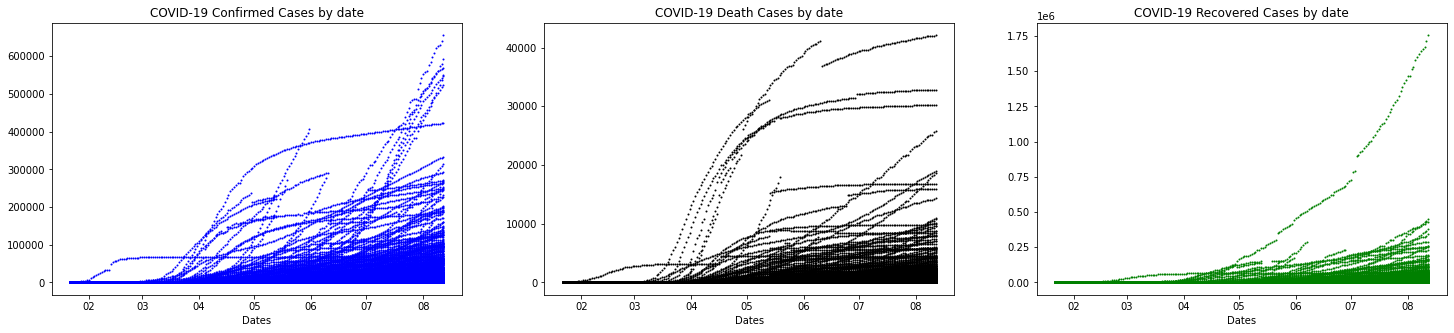

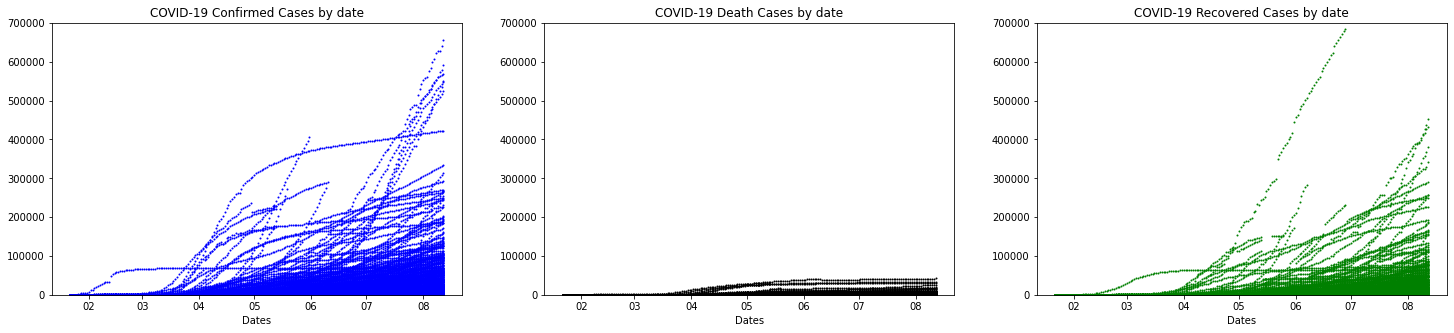

In [59]:
x = df['ObservationDate']
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,5), sharey=False, sharex=True)

#Confirmed Cases
y1 = df['Confirmed']
ax1.scatter(x, y1, s=1, color='b')
ax1.set_title('COVID-19 Confirmed Cases by date')
ax1.xaxis.set_major_formatter(date_format)

#Deaths
y2 = df['Deaths']
ax2.scatter(x, y2, s=1, color='k')
ax2.set_title('COVID-19 Death Cases by date')

#Recovered
y3 = df['Recovered']
ax3.scatter(x, y3, s=1, color='g')
ax3.set_title('COVID-19 Recovered Cases by date')

date_format = mdates.DateFormatter('%m')

for ax in fig.get_axes():
    ax.set_xlabel('Dates')
    ax.xaxis.set_major_formatter(date_format)

plt.show()


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,5), sharey=False, sharex=True)

#Confirmed Cases
y1 = df['Confirmed']
ax1.scatter(x, y1, s=1, color='b')
ax1.set_title('COVID-19 Confirmed Cases by date')
ax1.xaxis.set_major_formatter(date_format)

#Deaths
y2 = df['Deaths']
ax2.scatter(x, y2, s=1, color='k')
ax2.set_title('COVID-19 Death Cases by date')

#Recovered
y3 = df['Recovered']
ax3.scatter(x, y3, s=1, color='g')
ax3.set_title('COVID-19 Recovered Cases by date')

date_format = mdates.DateFormatter('%m')

for ax in fig.get_axes():
    ax.set_ylim(0,700000)
    ax.set_xlabel('Dates')
    ax.xaxis.set_major_formatter(date_format)

plt.show()

Gracias a estos gráficos, podemos confirmar que 

In [15]:
df_time_mean = df.groupby('ObservationDate').mean()
df_time_mean

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,14.605263,0.447368,0.736842
2020-01-23,14.195652,0.391304,0.652174
2020-01-24,22.951220,0.634146,0.878049
2020-01-25,32.681818,0.954545,0.886364
2020-01-26,45.063830,1.191489,1.106383
...,...,...,...
2020-08-08,26430.021534,978.170929,16068.787349
2020-08-09,26731.740242,984.288022,16306.628533
2020-08-10,27038.524899,990.835801,16528.290713


In [13]:
df_time = df.groupby('ObservationDate').median()
df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,1.0,0.0,0.0
2020-01-23,2.0,0.0,0.0
2020-01-24,4.0,0.0,0.0
2020-01-25,7.5,0.0,0.0
2020-01-26,8.0,0.0,0.0
...,...,...,...
2020-08-08,4504.0,90.0,1537.0
2020-08-09,4624.0,92.0,1560.0
2020-08-10,4630.0,93.0,1600.0


In [17]:
df_time_sum = df.groupby('ObservationDate').sum()
df_time_sum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-08-08,19637506.0,726781.0,11939109.0
2020-08-09,19861683.0,731326.0,12115825.0
2020-08-10,20089624.0,736191.0,12280520.0


In [68]:
def centered_len(max_len):
    def centered_string(string):
        if type(string) != 'string':
            string = str(string)
            
        rest = max_len - len(string)
        n_spaces = int(rest/2)

        string_spaces = ' ' * n_spaces
        
        centered_string = string_spaces + string + string_spaces

        if len(centered_string)<max_len:
            centered_string = ' ' + centered_string

        return centered_string
    return centered_string

In [18]:
start_day = datetime(year=2020, month=1, day=22)
end_day = datetime(year=2020, month=8, day=12)
days = end_day - start_day
days.days

203

In [19]:
dates = df['ObservationDate'].to_list()
confirmed = df['Confirmed'].to_list()
deaths = df['Deaths'].to_list()
recovered = df['Recovered'].to_list()

print(len(dates))
print(len(confirmed))
print(len(deaths))
print(len(recovered))

85638
85638
85638
85638


In [98]:
list_days = [start_day + timedelta(days=x) for x in range(days.days + 1)]

reference = [x for x in range(days.days + 1)]

date_dict = dict(zip(list_days, reference))

sum_confirmed = [0] *len(reference)
sum_deaths = [0] *len(reference)
sum_recovered = [0] *len(reference)

plus = 0
for d in range(len(list_days)):

    while dates[plus] == list_days[d] and (d + plus) < len(dates):
        sum_confirmed[d] = int(sum_confirmed[d]) + int(confirmed[d + plus])
        # print(d, sum_confirmed[d], confirmed[d + plus])
        sum_deaths[d] = int(sum_deaths[d]) + int(deaths[d + plus])
        sum_recovered[d] = int(sum_recovered[d]) + int(recovered[d + plus])
        plus += 1

centered_sum = centered_len(len(str(sum_recovered[-2])))
centered_date = centered_len(len("ObservationDate"))

print(f'{centered_date("ObservationDate")} | {centered_sum("Confirmed")} | {centered_sum("Deaths")} | {centered_sum("Recovered")}')
for d in range(len(list_days)):
    print(f'{centered_date(datetime.strftime(list_days[d], "%Y-%m-%d"))} | {centered_sum(sum_confirmed[d])}  | {centered_sum(sum_deaths[d])} | {centered_sum(sum_recovered[d])}')

ObservationDate | Confirmed |  Deaths  | Recovered
   2020-01-22   |    555    |    17    |    28   
   2020-01-23   |   1193    |    42    |    61   
   2020-01-24   |   1178    |    42    |    37   
   2020-01-25   |   1810    |    54    |    49   
   2020-01-26   |   2592    |    80    |    57   
   2020-01-27   |   5232    |    131   |    98   
   2020-01-28   |   5907    |    132   |    119  
   2020-01-29   |   7934    |    170   |    137  
   2020-01-30   |   9603    |    213   |    209  
   2020-01-31   |   11724   |    260   |    272  
   2020-02-01   |   16563   |    361   |    459  
   2020-02-02   |   19669   |    426   |    612  
   2020-02-03   |   23694   |    491   |    834  
   2020-02-04   |   27462   |    562   |   1086  
   2020-02-05   |   30638   |    636   |   1454  
   2020-02-06   |   34248   |    717   |   1969  
   2020-02-07   |   36999   |    806   |   2578  
   2020-02-08   |   40074   |    903   |   3214  
   2020-02-09   |   42623   |   1013   |   3932  

In [ ]:
countries = df['Country/Region'].to_list()
countries = list(set(countries))
countries.sort()